## Data Exploration

In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize']= (16, 12)

In [2]:
# load dataset
cleaned_df= pd.read_csv('cleaned_solar_irradiation.csv')
cleaned_df.head()

,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_GHI,Daily_radiation
0,2019-08-31,8,2019-08-31,26.423077,49.384615,77.769231,960.823077,213.769231,0.846154,35.384615,248.538462,233.000000
1,2019-09-01,9,2019-09-01,25.530769,49.538462,82.153846,960.523077,159.615385,1.507692,239.076923,457.846154,284.846154
2,2019-09-02,9,2019-09-02,25.469231,50.700000,81.923077,962.100000,232.923077,1.784615,221.153846,435.000000,251.307692
3,2019-09-03,9,2019-09-03,25.123077,48.076923,83.000000,962.846154,287.615385,1.815385,138.461538,369.769231,248.692308
4,2019-09-04,9,2019-09-04,26.692308,48.838462,76.769231,961.807692,177.538462,1.176923,230.923077,425.076923,286.384615


In [3]:
# Descriptive statistics summary
cleaned_df.describe()

,MonthPE,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_GHI,Daily_radiation
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,6.623853,28.847486,36.219244,52.301341,960.474996,184.989179,1.739344,251.154409,408.008653,228.092844
std,3.415467,3.460583,13.389532,27.783674,1.581544,57.255175,0.554892,174.709948,93.055384,58.849442
min,1.000000,20.338462,6.200000,6.846154,956.253846,58.230769,0.466667,0.000000,81.692308,81.692308
25%,4.000000,25.711538,22.580769,23.923077,959.307692,135.192308,1.346154,110.153846,360.807692,189.384615
50%,7.000000,29.616667,41.530769,57.000000,960.450000,191.615385,1.676923,228.153846,427.769231,236.538462
75%,9.000000,31.624038,47.838462,78.423077,961.538462,233.076923,2.103846,375.307692,475.461538,273.605769
max,12.000000,36.184615,55.492308,97.538462,965.538462,313.769231,4.315385,721.250000,564.916667,357.692308


In [4]:
# check the missing values
cleaned_df.isnull().sum()

Unnamed: 0         0
MonthPE            0
Date               0
Daily_Temp         0
Daily_Precip       0
Daily_Humidity     0
Daily_Pressure     0
Daily_WindDir      0
Daily_WindSpeed    0
Daily_DNI          0
Daily_GHI          0
Daily_radiation    0
dtype: int64

In [5]:
# summary of dataframe
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       763 non-null    object 
 1   MonthPE          763 non-null    int64  
 2   Date             763 non-null    object 
 3   Daily_Temp       763 non-null    float64
 4   Daily_Precip     763 non-null    float64
 5   Daily_Humidity   763 non-null    float64
 6   Daily_Pressure   763 non-null    float64
 7   Daily_WindDir    763 non-null    float64
 8   Daily_WindSpeed  763 non-null    float64
 9   Daily_DNI        763 non-null    float64
 10  Daily_GHI        763 non-null    float64
 11  Daily_radiation  763 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 71.7+ KB


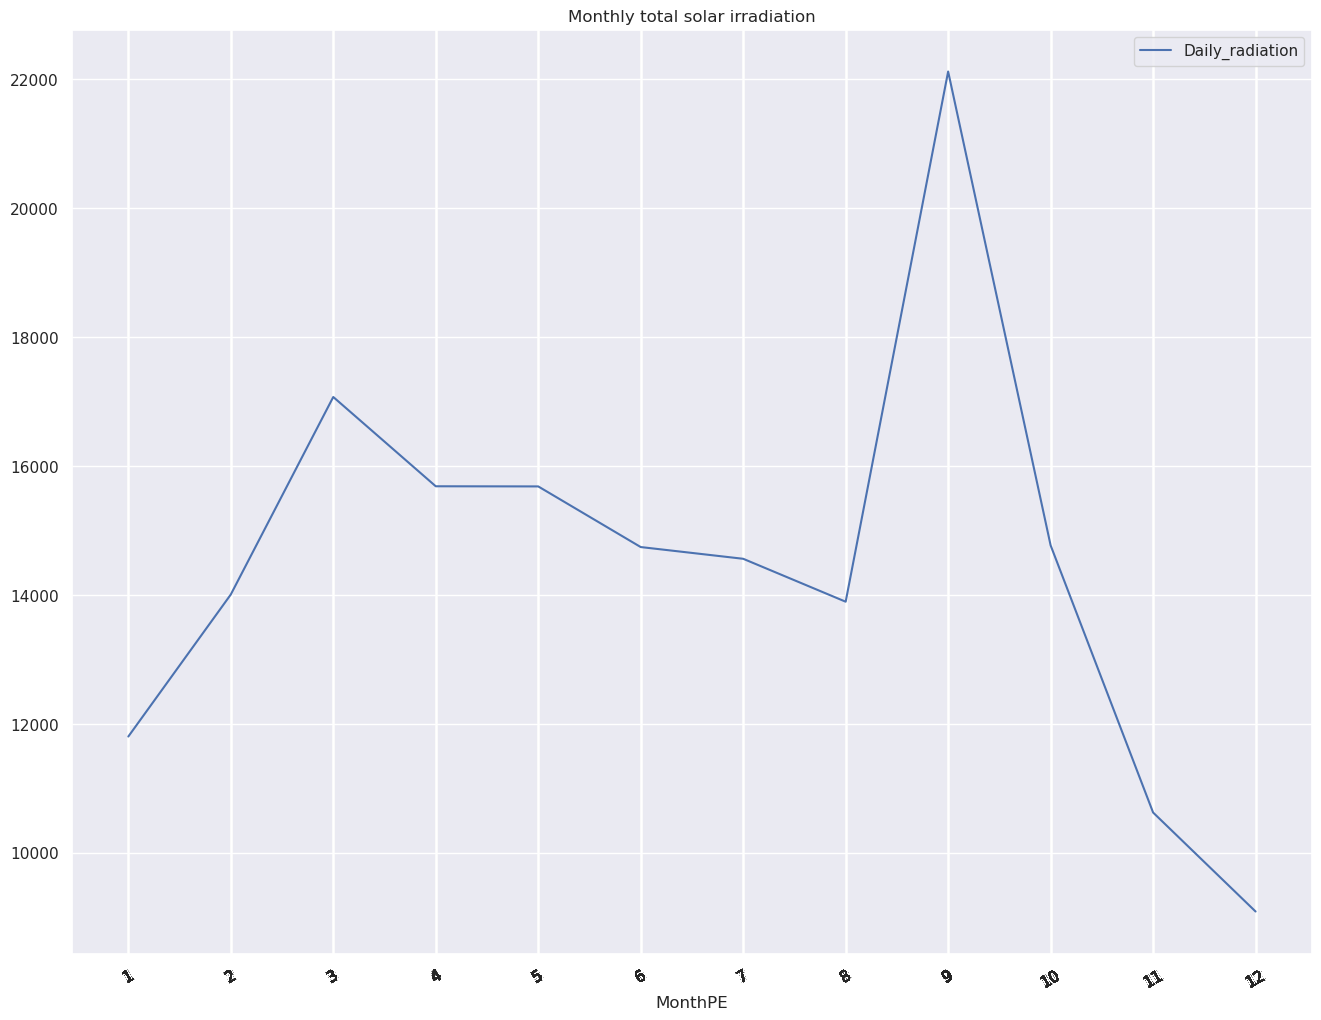

In [6]:
# A plot pf total irriadtion for each 
rad_vs_month= cleaned_df.loc[:, ['Daily_radiation', 'MonthPE']].groupby('MonthPE').sum()
rad_vs_month.plot()
plt.xticks(cleaned_df['MonthPE'], rotation=30)
plt.title('Monthly total solar irradiation')
plt.show()

Locator attempting to generate 4191 ticks ([-38.0, ..., 800.0000000000119]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4191 ticks ([-38.0, ..., 800.0000000000119]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4191 ticks ([-38.0, ..., 800.0000000000119]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4191 ticks ([-38.0, ..., 800.0000000000119]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4191 ticks ([-38.0, ..., 800.0000000000119]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4191 ticks ([-38.0, ..., 800.0000000000119]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4191 ticks ([-38.0, ..., 800.0000000000119]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4191 ticks ([-38.0, ..., 800.0000000000119]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 4191 ticks ([-38.0, ..., 800.000000000011

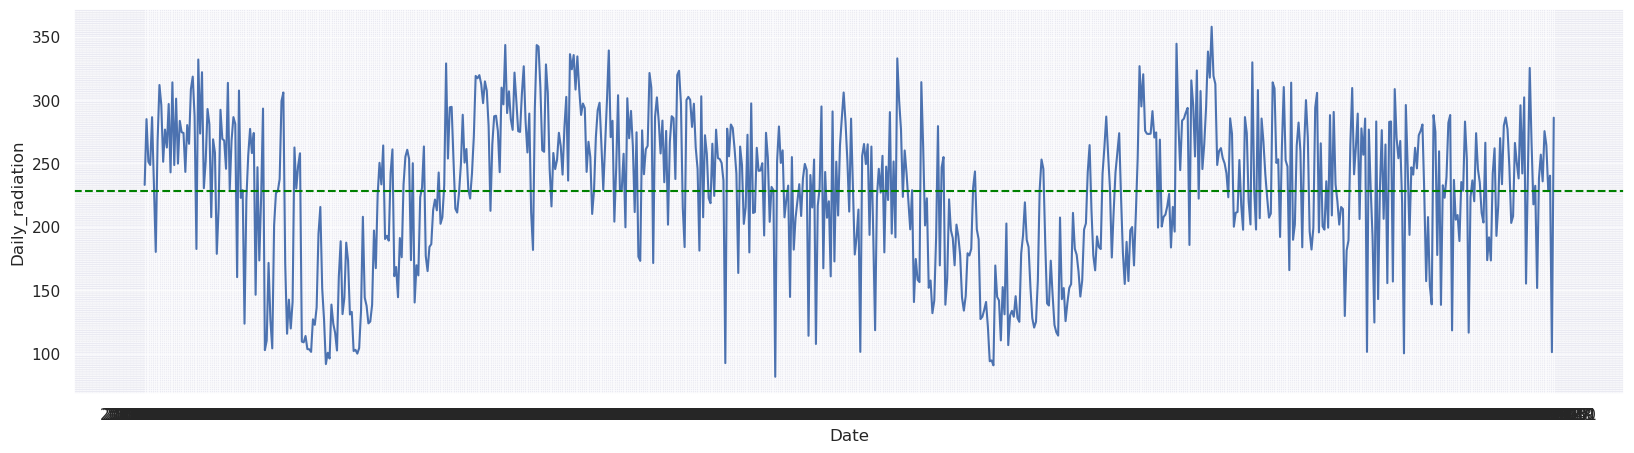

In [7]:
# Daily solar irradiation plot
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data= cleaned_df, x="Date", y="Daily_radiation")

rad_avg= cleaned_df['Daily_radiation'].mean()
ax.axhline(rad_avg, color='green', linestyle='--', label=f"Mean - {rad_avg:.2f}")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='white',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='white', alpha=0.7)

plt.show()
ax.legend()

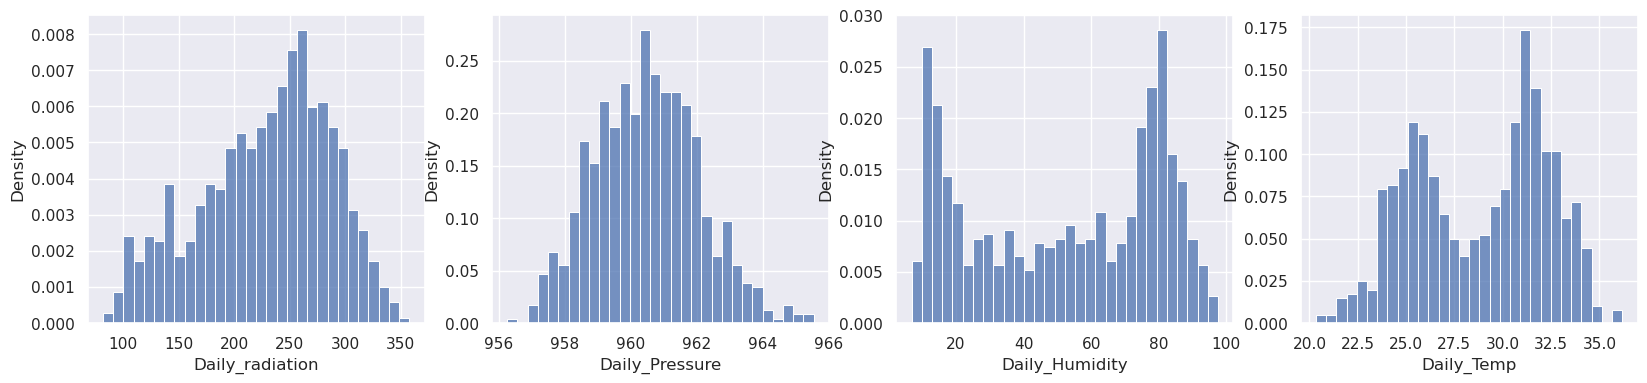

In [9]:
# Histogram distribution of weather features and solar irradiation
f, ax = plt.subplots(1, 4, figsize=(20,4))
sns.histplot(cleaned_df['Daily_radiation'], stat="density", bins=30, ax=ax[0])
sns.histplot(cleaned_df['Daily_Pressure'], stat="density", bins=30, ax=ax[1])
sns.histplot(cleaned_df['Daily_Humidity'], stat="density", bins=30, ax=ax[2])
sns.histplot(cleaned_df['Daily_Temp'], stat="density", bins=30, ax=ax[3])
plt.show()

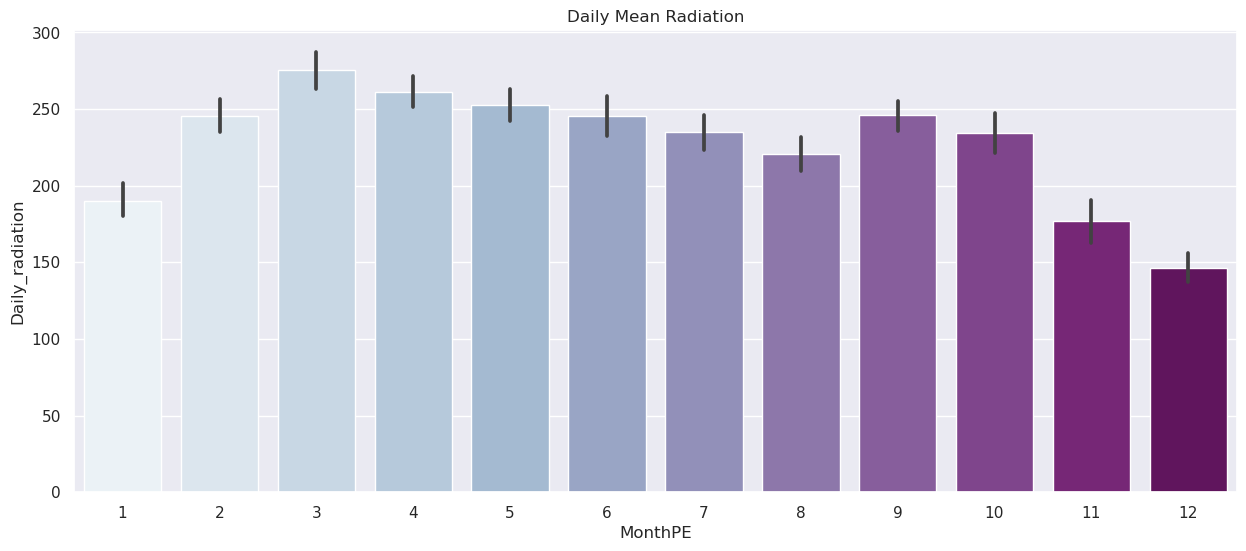

In [10]:
# Histogram plot of daily mean radiation
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="MonthPE", y='Daily_radiation', data= cleaned_df, palette= "BuPu")
ax.set_title('Daily Mean Radiation')
plt.show()

<ipython-input-11-a249a69263a0>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, annot=True, fmt=".2f")


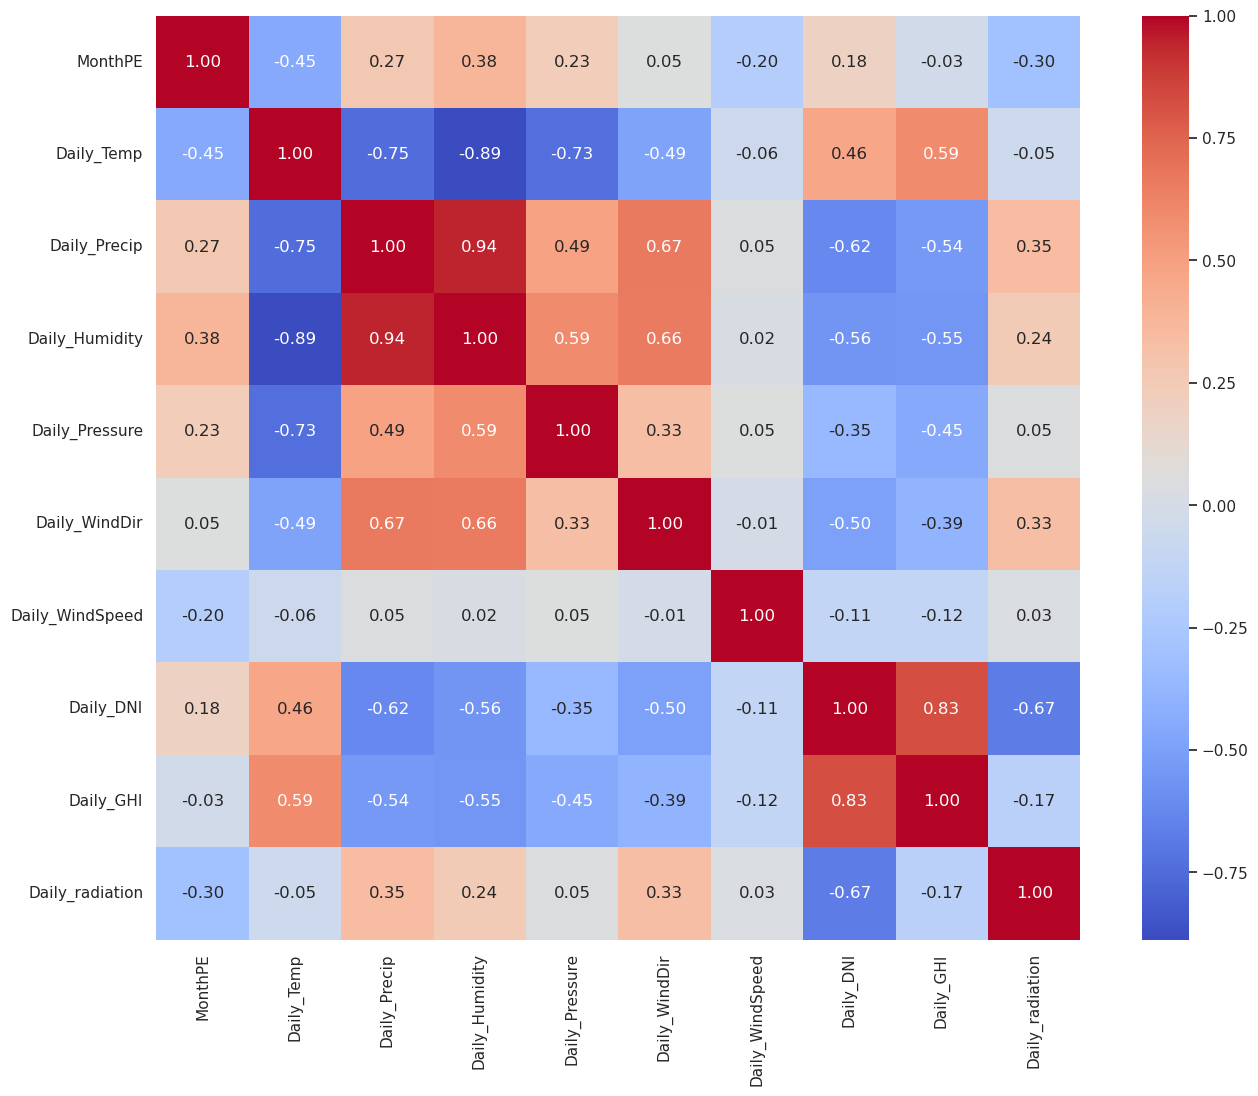

In [11]:
# feature correlation
corr= cleaned_df.corr(method = "pearson")

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, annot=True, fmt=".2f")
plt.show()

### Statistical check: stationary or non-stationary

In [12]:
# Adfuller testt on target feature
from statsmodels.tsa.stattools import adfuller
Xrad = cleaned_df['Daily_radiation'].values
result = adfuller(Xrad)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) <= 0.05

ADF Statistic: -2.551531
p-value: 0.103434
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [39]:
# convert to logarithm scale and test
Xrad = cleaned_df['Daily_radiation'].values
Xrad_log = log(X)
# Adfuller test
result= adfuller(Xrad_log)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.676318
p-value: 0.078227
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [13]:
# calculated daily shift in radiation
rad_data = cleaned_df['Daily_radiation'] - cleaned_df['Daily_radiation'].shift(1)

In [14]:
# adfuller test day shifted featture
X_shift = rad_data[1:].values
result = adfuller(X_shift)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.738235
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
